In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
%matplotlib inline

In [5]:
data = pd.read_csv('messidor_features.arff',error_bad_lines=False)

In [6]:
col = ['Quality','Pre-screening','MA1','MA2','MA3','MA4','MA5','MA6','MA7',
      'exudates1','exudates2','exudates3','exudates4','exudates5','exudates6','exudates7',
      'macula_opticdisc','opticdisc_diamter','AM/FM','Class_label']

In [7]:
data.columns = col

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 20 columns):
Quality              1150 non-null int64
Pre-screening        1150 non-null int64
MA1                  1150 non-null int64
MA2                  1150 non-null int64
MA3                  1150 non-null int64
MA4                  1150 non-null int64
MA5                  1150 non-null int64
MA6                  1150 non-null int64
MA7                  1150 non-null float64
exudates1            1150 non-null float64
exudates2            1150 non-null float64
exudates3            1150 non-null float64
exudates4            1150 non-null float64
exudates5            1150 non-null float64
exudates6            1150 non-null float64
exudates7            1150 non-null float64
macula_opticdisc     1150 non-null float64
opticdisc_diamter    1150 non-null float64
AM/FM                1150 non-null int64
Class_label          1150 non-null int64
dtypes: float64(10), int64(10)
memory usage: 179.8 KB

In [135]:
data.head()

,Quality,Pre-screening,MA1,MA2,MA3,MA4,MA5,MA6,MA7,exudates1,exudates2,exudates3,exudates4,exudates5,exudates6,exudates7,macula_opticdisc,opticdisc_diamter,AM/FM,Class_label
0,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
1,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
2,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
3,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
4,1,1,44,43,41,41,37,29,28.356400,6.935636,2.305771,0.323724,0.000000,0.000000,0.000000,0.000000,0.502831,0.126741,0,1


In [9]:
data.describe()

,Quality,Pre-screening,MA1,MA2,MA3,MA4,MA5,MA6,MA7,exudates1,exudates2,exudates3,exudates4,exudates5,exudates6,exudates7,macula_opticdisc,opticdisc_diamter,AM/FM,Class_label
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000
mean,0.996522,0.918261,38.442609,36.922609,35.152174,32.308696,28.756522,21.157391,64.109023,23.092632,8.707596,1.837415,0.561210,0.212469,0.085745,0.037254,0.523244,0.108439,0.335652,0.531304
std,0.058900,0.274086,25.627473,24.112084,22.812025,21.120307,19.515137,15.106656,58.509233,21.611526,11.572178,3.924805,2.485140,1.057568,0.398883,0.179034,0.028047,0.017951,0.472423,0.499236
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.268986,7.937161,1.242384,0.081552,0.000000,0.000000,0.000000,0.000000,0.502883,0.095786,0.000000,0.000000
50%,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.233267,17.023514,4.421672,0.481949,0.022324,0.001550,0.000000,0.000000,0.523315,0.106624,0.000000,1.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.839132,31.310584,11.775557,1.925969,0.192363,0.038503,0.004834,0.003850,0.543678,0.119633,1.000000,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


In [137]:
z = np.abs(stats.zscore(data))


In [122]:
print(z.shape)

(1150, 20)


In [138]:
data = data[(z < 3).all(axis=1)]

In [139]:
data.describe()

,Quality,Pre-screening,MA1,MA2,MA3,MA4,MA5,MA6,MA7,exudates1,exudates2,exudates3,exudates4,exudates5,exudates6,exudates7,macula_opticdisc,opticdisc_diamter,AM/FM,Class_label
count,967.0,967.0,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000
mean,1.0,1.0,37.952430,36.579111,35.010341,32.425026,29.115822,21.512927,58.517492,20.974702,7.254810,1.258746,0.258921,0.084107,0.032794,0.014706,0.523980,0.107468,0.319545,0.501551
std,0.0,0.0,24.203669,22.967564,22.019469,20.648501,19.334182,14.980235,48.593701,17.040037,8.176674,1.860274,0.696821,0.262497,0.124253,0.057801,0.027052,0.016509,0.466542,0.500256
min,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.075534,0.001552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.465424,0.057906,0.000000,0.000000
25%,1.0,1.0,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.394180,7.711875,1.227520,0.080748,0.000000,0.000000,0.000000,0.000000,0.503309,0.095372,0.000000,0.000000
50%,1.0,1.0,36.000000,35.000000,33.000000,30.000000,26.000000,19.000000,42.769066,16.402759,4.056426,0.436569,0.019493,0.001529,0.000000,0.000000,0.523373,0.106349,0.000000,1.000000
75%,1.0,1.0,55.000000,53.000000,52.000000,49.000000,44.000000,33.000000,78.138498,29.575167,10.640578,1.603455,0.163648,0.026929,0.003930,0.003002,0.544395,0.117735,1.000000,1.000000
max,1.0,1.0,114.000000,99.000000,94.000000,86.000000,81.000000,65.000000,238.433432,87.861083,43.289073,11.174429,7.084008,2.691530,1.168066,0.570585,0.592217,0.160210,1.000000,1.000000


In [71]:
from sklearn.preprocessing import StandardScaler

In [125]:
prep = StandardScaler()

In [99]:
X = prep.fit_transform(X)

In [141]:
X = data.drop(['Class_label','Quality','Pre-screening'],axis=1)

In [142]:
y = data['Class_label']

In [53]:
from sklearn.model_selection import train_test_split

In [143]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [55]:
from sklearn.linear_model import LogisticRegression

In [150]:
lr = LogisticRegression(solver='lbfgs',random_state=0,max_iter=200)

In [151]:
lr = LogisticRegression()

In [152]:
lr.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
predict = lr.predict(X_test)

In [154]:
print("Train - ",lr.score(X_train,y_train))
print("Test - ",lr.score(X_test,y_test))

Train -  0.7514792899408284
Test -  0.7560137457044673


In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [156]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[118  27]
 [ 44 102]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       145
           1       0.79      0.70      0.74       146

    accuracy                           0.76       291
   macro avg       0.76      0.76      0.76       291
weighted avg       0.76      0.76      0.76       291



In [159]:
from sklearn.neighbors import KNeighborsClassifier

In [166]:
knn = KNeighborsClassifier()

In [163]:
knn_error = []
for i in range(2,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_predict= knn.predict(X_test)
    knn_error.append(np.mean(y_test!=knn_predict))

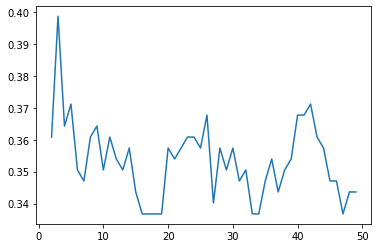

In [183]:
plt.plot(range(2,50),knn_error)

In [184]:
knn = KNeighborsClassifier(n_neighbors=19)

In [185]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [186]:
knnpredict=knn.predict(X_test)

In [187]:
print(confusion_matrix(y_test,knnpredict))
print(classification_report(y_test,knnpredict))

[[102  43]
 [ 55  91]]
              precision    recall  f1-score   support

           0       0.65      0.70      0.68       145
           1       0.68      0.62      0.65       146

    accuracy                           0.66       291
   macro avg       0.66      0.66      0.66       291
weighted avg       0.66      0.66      0.66       291



In [167]:
from sklearn.model_selection import GridSearchCV

In [171]:
neigh={'n_neighbors':np.array(range(2,50))}

In [188]:
knn_grid=GridSearchCV(KNeighborsClassifier(),neigh,verbose=4,refit=True,cv=3)

In [189]:
knn_grid.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.580, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.649, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.578, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.619, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.649, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.604, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... n_neighbors=7, score=0.596, total=   0.0s
[CV] n_neighbors=7 ...................................................
[CV] ....................... n_neighbors=7, score=0.644, total=   0.0s
[CV] n_neighbors=8 ...................................................
[CV] ....................... n_neighbors=8, score=0.642, total=   0.0s
[CV] n_neighbors=8 ...................................................
[CV] ....................... n_neighbors=8, score=0.604, total=   0.0s
[CV] n_neighbors=8 ...................................................
[CV] ....................... n_neighbors=8, score=0.667, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] ....................... n_neighbors=9, score=0.628, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] ....................... n_neighbors=9, score=0.600, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] .

[CV] ...................... n_neighbors=32, score=0.636, total=   0.0s
[CV] n_neighbors=32 ..................................................
[CV] ...................... n_neighbors=32, score=0.644, total=   0.0s
[CV] n_neighbors=33 ..................................................
[CV] ...................... n_neighbors=33, score=0.628, total=   0.0s
[CV] n_neighbors=33 ..................................................
[CV] ...................... n_neighbors=33, score=0.622, total=   0.0s
[CV] n_neighbors=33 ..................................................
[CV] ...................... n_neighbors=33, score=0.644, total=   0.0s
[CV] n_neighbors=34 ..................................................
[CV] ...................... n_neighbors=34, score=0.637, total=   0.0s
[CV] n_neighbors=34 ..................................................
[CV] ...................... n_neighbors=34, score=0.636, total=   0.0s
[CV] n_neighbors=34 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    1.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [190]:
knn_predict = knn_grid.predict(X_test)

In [191]:
print(confusion_matrix(y_test,knn_predict))
print(classification_report(y_test,knn_predict))

[[107  38]
 [ 66  80]]
              precision    recall  f1-score   support

           0       0.62      0.74      0.67       145
           1       0.68      0.55      0.61       146

    accuracy                           0.64       291
   macro avg       0.65      0.64      0.64       291
weighted avg       0.65      0.64      0.64       291

